In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_helper_calc
import seaborn as sns
%matplotlib inline
font = {
        'size'   : 22}
mpl.rc('font', **font)

In [3]:
pip install git+https://github.com/scls19fr/pandas-helper-calc

  Cloning https://github.com/scls19fr/pandas-helper-calc to /tmp/pip-req-build-pjqf_ujz
  Stored in directory: /tmp/pip-ephem-wheel-cache-e608cer_/wheels/3a/61/04/aaba36681e1c440e45a195119a13b2d86645158ae5dd984c14
Successfully built pandas-helper-calc
Note: you may need to restart the kernel to use updated packages.


In [107]:
dfm = pd.read_csv("./bases/suicide/suicidioMasculinoGlobal.csv")
dfmasc = pd.read_csv("./bases/suicide/suicidioMasculino.csv")

In [106]:
dfe = pd.read_csv("./bases/education/EdStatsAjustado.csv")

In [108]:
dff = pd.read_csv("./bases/suicide/suicidioFemininoGlobal.csv")
dffem = pd.read_csv("./bases/suicide/suicidiofeminino.csv")

In [114]:
df = pd.merge(dfm, dff, on='year', suffixes=['m','f'])

,suicidio514m,suicidio1524m,suicidio2534m,suicidio3554m,suicidio5574m,suicidio75m,suicidio514f,suicidio1524f,suicidio2534f,suicidio3554f,suicidio5574f,suicidio75f
year,,,,,,,,,,,,
2000,0.917823,15.574293,22.131225,30.205056,33.325557,44.952440,0.383305,4.137453,4.767158,6.772933,9.223558,13.444676
2001,0.911151,15.628239,22.267466,30.047812,32.586633,43.474922,0.437079,4.036882,4.573605,6.698955,8.720274,12.756432
2002,0.873582,15.135177,21.920917,29.594623,32.198154,43.242430,0.453207,3.962325,4.715913,6.801999,8.843032,12.972294
2003,0.809999,14.507426,21.574055,29.346279,31.951280,43.374842,0.406705,4.121773,4.724076,6.678534,8.647484,12.648318
2004,0.820339,14.423914,20.938136,28.111107,30.338971,42.514673,0.440076,4.035254,4.644175,6.691840,8.314326,12.244032
2005,0.823677,13.881210,20.447790,26.908583,29.606720,41.829104,0.418887,4.073182,4.741869,6.376652,8.112216,11.704377
2006,0.772418,13.480570,19.593997,25.278026,28.400195,40.411076,0.436965,3.843247,4.422449,6.236088,7.758203,11.253909
2007,0.745341,13.434264,19.583640,24.505349,27.676421,40.491455,0.424934,3.998965,4.786422,6.301104,7.770666,11.108271
2008,0.703871,13.597845,19.352412,24.499272,27.644847,39.852697,0.456257,4.198253,4.848021,6.418267,7.546812,10.843556


In [58]:
dfx = df[dfe.IndicatorCode == 'NY.GDP.PCAP.PP.CD']
dfx = dfx[["CountryCode","Year","Value"]].reset_index(drop=True)
dfx.rename(columns={'CountryCode':'countrycode','Year':'year','Value':'value'},inplace=True)

In [60]:
dfmasc = dfmasc.join(dfx.set_index(['countrycode','year']), on=['countrycode','year'])
dfmasc.rename(columns={'value':'gdp'}, inplace=True)

In [115]:
dff

,suicidio514,suicidio1524,suicidio2534,suicidio3554,suicidio5574,suicidio75
year,,,,,,
2000,0.383305,4.137453,4.767158,6.772933,9.223558,13.444676
2001,0.437079,4.036882,4.573605,6.698955,8.720274,12.756432
2002,0.453207,3.962325,4.715913,6.801999,8.843032,12.972294
2003,0.406705,4.121773,4.724076,6.678534,8.647484,12.648318
2004,0.440076,4.035254,4.644175,6.691840,8.314326,12.244032
2005,0.418887,4.073182,4.741869,6.376652,8.112216,11.704377
2006,0.436965,3.843247,4.422449,6.236088,7.758203,11.253909
2007,0.424934,3.998965,4.786422,6.301104,7.770666,11.108271
2008,0.456257,4.198253,4.848021,6.418267,7.546812,10.843556


In [100]:
dfm

,suicidio514,suicidio1524,suicidio2534,suicidio3554,suicidio5574,suicidio75
year,,,,,,
2000,0.917823,15.574293,22.131225,30.205056,33.325557,44.952440
2001,0.911151,15.628239,22.267466,30.047812,32.586633,43.474922
2002,0.873582,15.135177,21.920917,29.594623,32.198154,43.242430
2003,0.809999,14.507426,21.574055,29.346279,31.951280,43.374842
2004,0.820339,14.423914,20.938136,28.111107,30.338971,42.514673
2005,0.823677,13.881210,20.447790,26.908583,29.606720,41.829104
2006,0.772418,13.480570,19.593997,25.278026,28.400195,40.411076
2007,0.745341,13.434264,19.583640,24.505349,27.676421,40.491455
2008,0.703871,13.597845,19.352412,24.499272,27.644847,39.852697


In [109]:
dff = dff.reset_index(drop=True).set_index('year')
dfm = dfm.reset_index(drop=True).set_index('year')

In [130]:
cor = []

list(map(lambda x: dfm[x].corr(dff[x]), dff.columns))

#for col in dff.columns():
 #   corr.append(dfm[col].corr(dff[col]))

[-0.45303775892752335,
 -0.08199164925577923,
 0.37126299255701567,
 0.9616078937694269,
 0.993182655885914,
 0.9882847964904455]

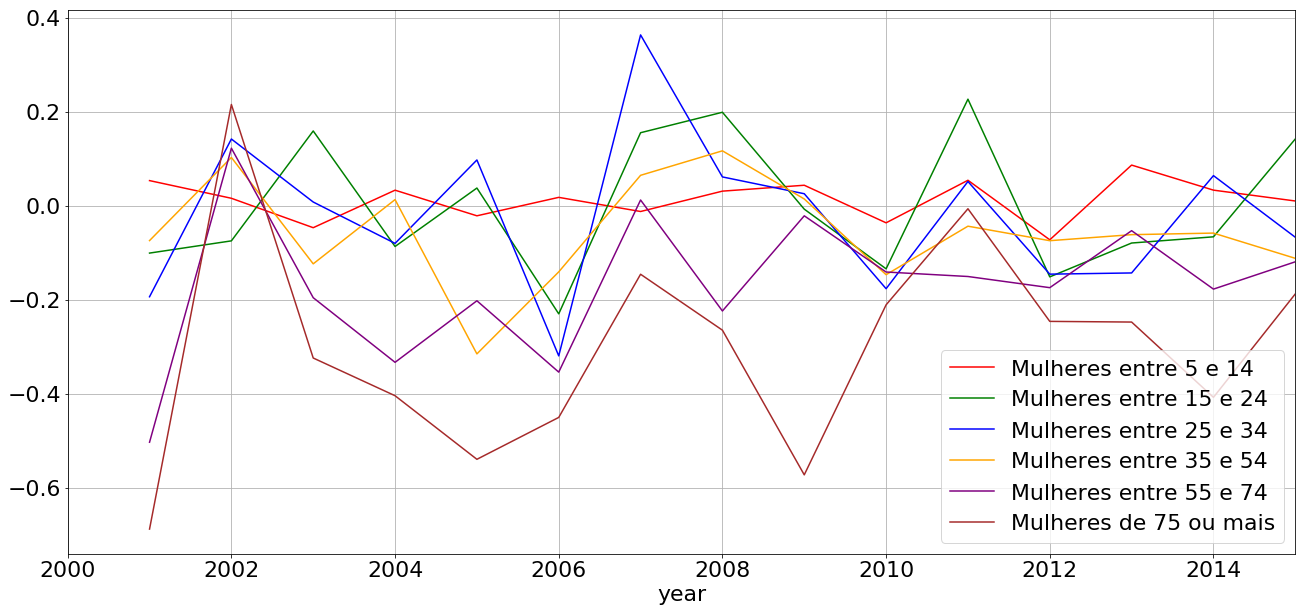

In [131]:
fig, ax = plt.subplots(figsize=(22, 10))
dffdiff = pd.DataFrame(columns=['une514','une1524', 'une2534', 'une3554','une5574','une75'])
dffdiff['une514'] = dff['suicidio514'].calc.derivative()
dffdiff['une1524'] = dff['suicidio1524'].calc.derivative()
dffdiff['une2534'] = dff['suicidio2534'].calc.derivative()
dffdiff['une3554'] = dff['suicidio3554'].calc.derivative()
dffdiff['une5574'] = dff['suicidio5574'].calc.derivative()
dffdiff['une75'] = dff['suicidio75'].calc.derivative()
dffdiff['une514'].plot(grid=True, ax=ax, color='red',label="Mulheres entre 5 e 14")
dffdiff['une1524'].plot(grid=True, ax=ax, color='green', label="Mulheres entre 15 e 24")
dffdiff['une2534'].plot(grid=True, ax=ax, color='blue', label="Mulheres entre 25 e 34")
dffdiff['une3554'].plot(grid=True, ax=ax, color='orange', label="Mulheres entre 35 e 54")
dffdiff['une5574'].plot(grid=True, ax=ax, color='purple', label="Mulheres entre 55 e 74")
dffdiff['une75'].plot(grid=True, ax=ax, color='brown', label="Mulheres de 75 ou mais")
ax.legend()

In [132]:
dffdiff

,une514,une1524,une2534,une3554,une5574,une75
year,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN
2001,0.053774,-0.100570,-0.193553,-0.073978,-0.503284,-0.688244
2002,0.016128,-0.074557,0.142308,0.103044,0.122758,0.215863
2003,-0.046502,0.159448,0.008163,-0.123465,-0.195548,-0.323977
2004,0.033372,-0.086519,-0.079901,0.013306,-0.333159,-0.404286
2005,-0.021190,0.037928,0.097693,-0.315188,-0.202109,-0.539655
2006,0.018079,-0.229935,-0.319420,-0.140563,-0.354013,-0.450468
2007,-0.012031,0.155718,0.363973,0.065015,0.012464,-0.145638
2008,0.031323,0.199288,0.061599,0.117163,-0.223854,-0.264715


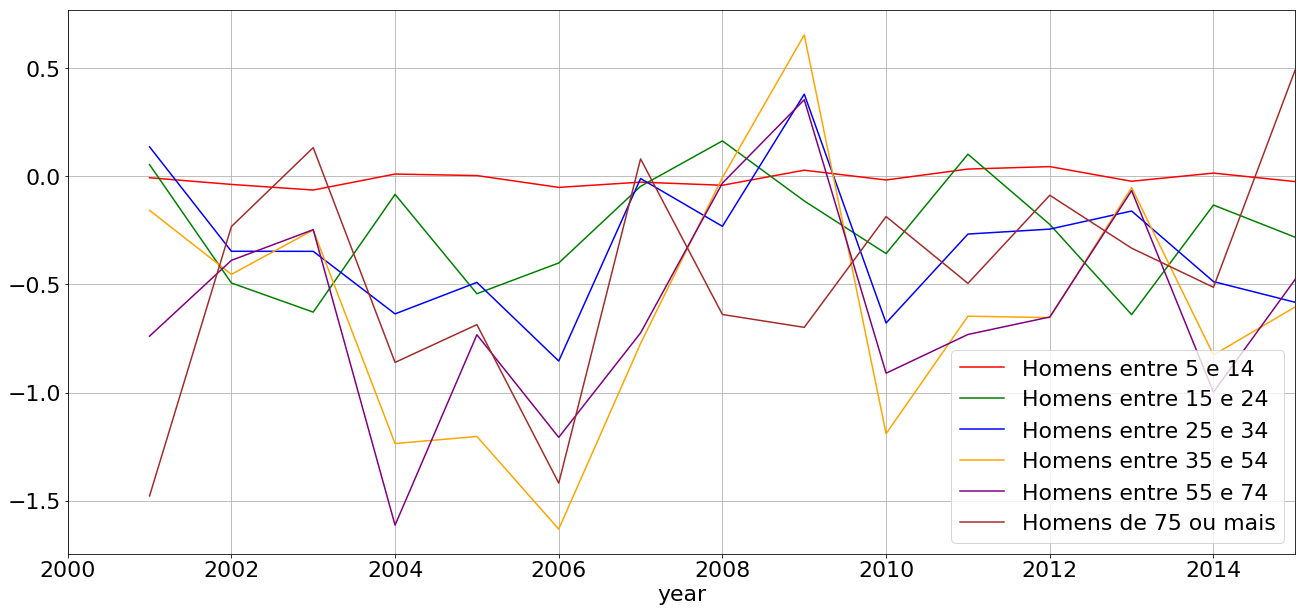

In [133]:
fig, ax = plt.subplots(figsize=(22, 10))
dfmdiff = pd.DataFrame(columns=['une514','une1524', 'une2534', 'une3554','une5574','une75'])
dfmdiff['une514'] = dfm['suicidio514'].calc.derivative()
dfmdiff['une1524'] = dfm['suicidio1524'].calc.derivative()
dfmdiff['une2534'] = dfm['suicidio2534'].calc.derivative()
dfmdiff['une3554'] = dfm['suicidio3554'].calc.derivative()
dfmdiff['une5574'] = dfm['suicidio5574'].calc.derivative()
dfmdiff['une75'] = dfm['suicidio75'].calc.derivative()
dfmdiff['une514'].plot(grid=True, ax=ax, color='red',label="Homens entre 5 e 14")
dfmdiff['une1524'].plot(grid=True, ax=ax, color='green', label="Homens entre 15 e 24")
dfmdiff['une2534'].plot(grid=True, ax=ax, color='blue', label="Homens entre 25 e 34")
dfmdiff['une3554'].plot(grid=True, ax=ax, color='orange', label="Homens entre 35 e 54")
dfmdiff['une5574'].plot(grid=True, ax=ax, color='purple', label="Homens entre 55 e 74")
dfmdiff['une75'].plot(grid=True, ax=ax, color='brown', label="Homens de 75 ou mais")
ax.legend()

In [134]:
list(map(lambda x: dfmdiff[x].corr(dffdiff[x]), dffdiff.columns))

[0.05542276590166544,
 0.29971422022443917,
 0.34467763921320266,
 0.4548776837549196,
 0.49504478442766536,
 0.5977163053264302]

In [78]:
dfcorr = pd.DataFrame(columns=['country','une1524', 'une2534', 'une3554','une5574','une75'])

for name, group in dfmasc.groupby('country'):
    a = group['suicidio1524'].corr(group['gdp'])
    b = group['suicidio2534'].corr(group['gdp'])
    c = group['suicidio3554'].corr(group['gdp'])
    d = group['suicidio5574'].corr(group['gdp'])
    e = group['suicidio75'].corr(group['gdp'])
    dfcorr = dfcorr.append(pd.Series([name,a,b,c,d,e], index=dfcorr.columns ),ignore_index=True)
    dfcorr.rename(columns={'une1524':'15-24','une2534':'25-34','une3554':'35-54','une5574':'55-74','une75':'75+'},inplace=True)
dfcorr = dfcorr.melt(id_vars=["country"], 
        var_name="nome",
        value_name="correlacao")
dfcorr

/home/nicoedu/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/nicoedu/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,country,nome,correlacao
0,Albania,15-24,-0.093506
1,Antigua and Barbuda,15-24,NaN
2,Argentina,15-24,0.635655
3,Armenia,15-24,0.067487
4,Aruba,15-24,NaN
5,Australia,15-24,-0.458851
6,Austria,15-24,-0.833744
7,Bahamas,15-24,0.181533
8,Bahrain,15-24,-0.031617
9,Barbados,15-24,-0.407708


Text(0.5, 1.0, 'Correlação entre suicídios masculinos e gdp')

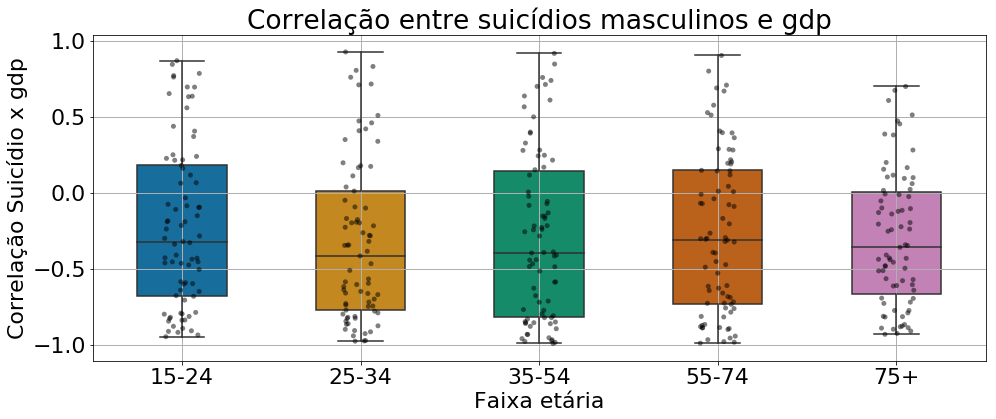

In [67]:
fig, ax = plt.subplots(figsize=(16, 6))

bplot=sns.boxplot(y='correlacao', x='nome', 
                 data=dfcorr, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='correlacao', x='nome', 
                   data=dfcorr, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
ax.grid(b=True, which='major', linewidth=1)
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Correlação Suicídio x gdp')
ax.set_title("Correlação entre suicídios masculinos e gdp")